In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from wordcloud import WordCloud
import datetime
from textblob import TextBlob

nltk_data_path = "../libs/nltk_data"
nltk.data.path.append(nltk_data_path)

In [2]:
df = pd.read_csv("../data/processed/20250416_2204_garminconnect_df_cleaned.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2367 entries, 0 to 2366
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         2367 non-null   int64 
 1   URL                2367 non-null   object
 2   User               2367 non-null   object
 3   Profile URL        2367 non-null   object
 4   Avatar             2367 non-null   object
 5   Date               2367 non-null   object
 6   Rating             2367 non-null   int64 
 7   Recommendation     2367 non-null   object
 8   Preliminary        2367 non-null   bool  
 9   Episodes Watched   569 non-null    object
 10  Review             2367 non-null   object
 11  Permalink          2367 non-null   object
 12  Review ID          2367 non-null   int64 
 13  Gift URL           2367 non-null   object
 14  More Reviews URL   2367 non-null   object
 15  User Review Count  2367 non-null   int64 
 16  Reactions          2367 non-null   object


In [3]:
# Function to extract sentiment polarity and subjectivity
def get_sentiment(text):
    blob = TextBlob(str(text))  # Ensure text is string
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Apply sentiment analysis on 'processed_review'
df[['polarity', 'subjectivity']] = df['processed_review'].apply(
    lambda x: pd.Series(get_sentiment(x))
)

# Optional: Categorize sentiment into positive, neutral, negative
def categorize_sentiment(polarity):
    if polarity > 0.1:
        return 'positive'
    elif polarity < -0.1:
        return 'negative'
    else:
        return 'neutral'

df['sentiment_label'] = df['polarity'].apply(categorize_sentiment)

# Preview the results
print(df[['processed_review', 'polarity', 'subjectivity', 'sentiment_label']].head())

                                    processed_review  polarity  subjectivity  \
0  life short even bother someone live thousand y...  0.037982      0.426523   
1  feel catered feel like eternity since give phe...  0.189701      0.495249   
2  style frieren not_have unique style way feel l... -0.033294      0.564204   
3  tldr not_recommend anyone standard enjoy fanta...  0.054717      0.446875   
4  episode frieren appear unique masterpiece stor...  0.133458      0.462928   

  sentiment_label  
0         neutral  
1        positive  
2         neutral  
3         neutral  
4        positive  


In [4]:
date_today = datetime.datetime.today().strftime("%Y%m%d_%H%M")
df.to_csv(f"../data/processed/{date_today}_df_cleaned_sentiment_textblob.csv", index=False)

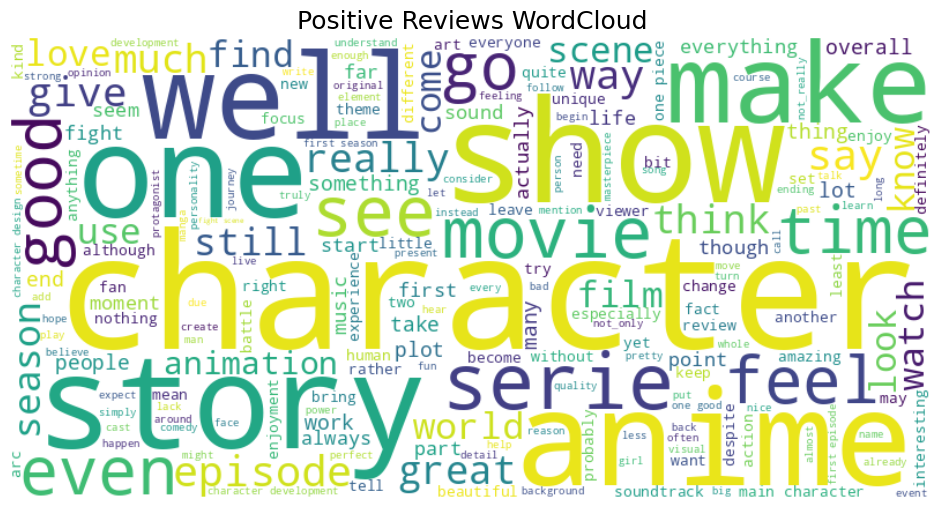

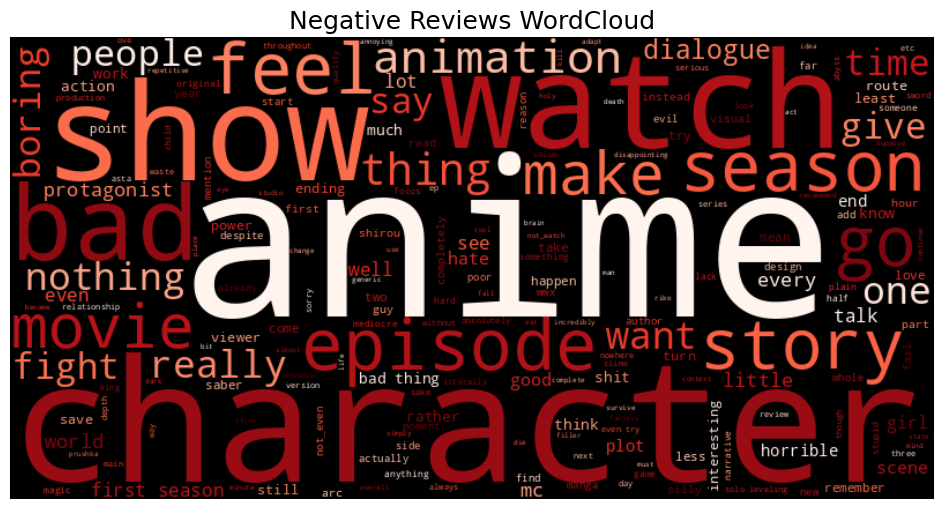

In [6]:
# Separate positive and negative texts
positive_text = " ".join(df[df['sentiment_label'] == 'positive']['processed_review'].dropna())
negative_text = " ".join(df[df['sentiment_label'] == 'negative']['processed_review'].dropna())

# Generate word clouds
positive_wc = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wc = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)

# Plot Positive WordCloud
plt.figure(figsize=(12, 6))
plt.title("Positive Reviews WordCloud", fontsize=18)
plt.imshow(positive_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# Plot Negative WordCloud
plt.figure(figsize=(12, 6))
plt.title("Negative Reviews WordCloud", fontsize=18)
plt.imshow(negative_wc, interpolation='bilinear')
plt.axis('off')
plt.show()